##Homework 3: Regression

We will try to predict the percentage of votes won by Bill Clinton in the 1992 election.

###Imports

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

C:\Users\tiffa\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


###Question 1: Read the data

In [99]:
df = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', sep='\s\s+', names= ['countyName','percentVoting', 'medianAge', 'meanSavings', 'perCapitalIncome', 'percentPoverty', 'percentVeterans', 'percentFemale', 'popDensity', 'percentNursing', 'crimeIndex'],index_col='countyName', engine='python')
df[:10]

,percentVoting,medianAge,meanSavings,perCapitalIncome,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex
countyName,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51


###Question 2: Predict percentVoting on all regressors

medianAge and crimeIndex are the worst regressor p-values

In [129]:
y, X = dmatrices('percentVoting ~ medianAge + meanSavings + perCapitalIncome + percentPoverty + percentVeterans + percentFemale + popDensity + percentNursing + crimeIndex', data=df, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print result.pvalues.sort_values(ascending = False)

medianAge            2.386186e-01
crimeIndex           1.419496e-01
perCapitalIncome     1.761381e-02
percentNursing       5.246414e-03
percentVeterans      3.852591e-04
meanSavings          4.859660e-10
Intercept            5.457367e-11
popDensity           8.177372e-22
percentFemale        4.425751e-23
percentPoverty      9.526970e-100
dtype: float64


###Question 3: A formula-creating function

In [131]:
def formula(listreg):
    return 'percentVoting ~ ' + ' + '.join(listreg)

###Question 4: R-squared computation function

In [83]:
def rsquared(listreg):
    calculation = formula(listreg)
    y, X = dmatrices(calculation, data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    return result.rsquared

#test
listOfRegressors = ['percentPoverty','popDensity']
rsquared(listOfRegressors)

0.28582980229105792

###Question 5: Find the next best regressor

In [188]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    improvements = {}
    
    #get the list of regressors that we want to check 
    regressors_list = list(set(all_regressors_list) - set(current_regressor_list))

    for regressor in regressors_list:
        temporary = current_regressor_list[:]
        temporary.append(regressor)
        #print temporary
        
        improvements[regressor] = rsquared(temporary)
    #print improvements
    bestRegressor = max(improvements, key=improvements.get)
    return (bestRegressor, improvements[bestRegressor])

#test
best_next_regressor(['percentPoverty','medianAge'], ['medianAge', 'meanSavings', 'perCapitalIncome', 'percentPoverty', 'percentVeterans', 'percentFemale', 'popDensity', 'percentNursing', 'crimeIndex'])

('popDensity', 0.28709905994748541)

###Question 6: Pick the k best regressors

In [180]:
def best_regressors(num, all_regressors):
    #will keep track of current best regressors for looping
    current = []
    #will keep track of current best regressors along with the r squared
    best_regressors_list = []
    complete_list = []
    for i in range(num):
        x = best_next_regressor(current, all_regressors)
        #convert x to a list because it will be returning a tuple and we want to continue updating our current regressors
        y = list(x) 
        #grab the regressor from y list and append it to current regressors list
        current.append(y[0])
        best_regressors_list.append(x)
        #print current
        #print x
        complete_item = (current[:i+1], x[1])
        complete_list.append(complete_item)
    return complete_list
    #return best_regressors_list

    
num_regressors = 6
all_regressors_list = ['medianAge', 'meanSavings', 'perCapitalIncome', 'percentPoverty', 'percentVeterans', 'percentFemale', 'popDensity', 'percentNursing', 'crimeIndex']
results = best_regressors(num_regressors, all_regressors_list)
#print results
for i in results:
    print i

(['percentPoverty'], 0.25103851961631962)
(['percentPoverty', 'popDensity'], 0.28582980229105792)
(['percentPoverty', 'popDensity', 'percentFemale'], 0.30914506632485794)
(['percentPoverty', 'popDensity', 'percentFemale', 'meanSavings'], 0.31924118502370513)
(['percentPoverty', 'popDensity', 'percentFemale', 'meanSavings', 'percentVeterans'], 0.32299256887291694)
(['percentPoverty', 'popDensity', 'percentFemale', 'meanSavings', 'percentVeterans', 'percentNursing'], 0.32485127138693681)


###Question 7: Order all regressors in the best order

In [181]:
#fill up the number_of_all_regressors with the length of all possible regressors
#pass it to the best_regressors method so that it can order the best regressors

number_of_all_regressors = len(all_regressors_list)
#print number_of_all_regressors
results_for_all = best_regressors(number_of_all_regressors, all_regressors_list)
#print results_for_all

for i in results_for_all:
    #convert each tuple item to list 
    item = list(i)
    #print item
    #grab last regressor to print them in order
    print item[0][-1]
    

percentPoverty
popDensity
percentFemale
meanSavings
percentVeterans
percentNursing
perCapitalIncome
crimeIndex
medianAge


###Question 8: Plot the R-squared values as regressors are added in the best order

In [182]:
df_rsquared = DataFrame.from_records(results_for_all, columns = ['Regressors','R-Square Value'], index = 'Regressors')
df_rsquared

,R-Square Value
Regressors,
[percentPoverty],0.251039
"[percentPoverty, popDensity]",0.285830
"[percentPoverty, popDensity, percentFemale]",0.309145
"[percentPoverty, popDensity, percentFemale, meanSavings]",0.319241
"[percentPoverty, popDensity, percentFemale, meanSavings, percentVeterans]",0.322993
"[percentPoverty, popDensity, percentFemale, meanSavings, percentVeterans, percentNursing]",0.324851
"[percentPoverty, popDensity, percentFemale, meanSavings, percentVeterans, percentNursing, perCapitalIncome]",0.325825
"[percentPoverty, popDensity, percentFemale, meanSavings, percentVeterans, percentNursing, perCapitalIncome, crimeIndex]",0.326553
"[percentPoverty, popDensity, percentFemale, meanSavings, percentVeterans, percentNursing, perCapitalIncome, crimeIndex, medianAge]",0.326900


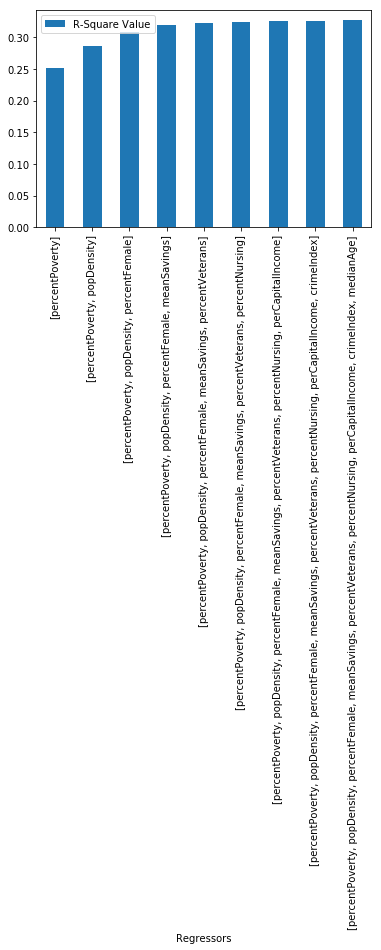

In [183]:
df_rsquared.plot(kind = 'bar')

###Question 9: Create a classification target

In [204]:
df['target'] = 0
mask = (df['percentVoting'] >= 40.0)
df.loc[mask, 'target'] = 1.0
df[:10]

,percentVoting,medianAge,meanSavings,perCapitalIncome,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex,target
countyName,,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266,1.0
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560,0.0
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218,1.0
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51,1.0


###Question 10: Create training and test sets

Text(0,0.5,u'Population Density')

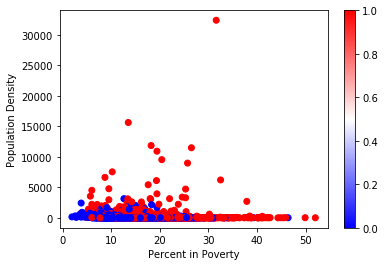

In [205]:
Y, X = dmatrices('target ~ 0 + percentPoverty + popDensity',
                 df,return_type="dataframe")

y = Y['target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = scatter(df['percentPoverty'], df['popDensity'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Percent in Poverty')
ylabel('Population Density')

###Question 11: Accuracy of classification

In [210]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

neighbor_amounts = [1, 3, 5, 10, 20, 50, 100, 1000]

for amount in neighbor_amounts:
    print str(amount) + ' Neighbors'
    
    model = neighbors.KNeighborsClassifier(n_neighbors=amount, weights='uniform', p=2)
    model.fit(X_train, y_train)
    
    prediction_on_training = model.predict(X_train)
    prediction_testing = model.predict(X_test)
    
    training_score = metrics.accuracy_score(y_train, prediction_on_training)
    print "Training score: " + str(training_score)
    testing_score = metrics.accuracy_score(y_test, prediction_testing)
    print "Testing score: " + str(testing_score)
    print

1 Neighbors
Training score: 0.997885835095
Testing score: 0.600985221675

3 Neighbors
Training score: 0.788054968288
Testing score: 0.635467980296

5 Neighbors
Training score: 0.748414376321
Testing score: 0.630541871921

10 Neighbors
Training score: 0.720401691332
Testing score: 0.646551724138

20 Neighbors
Training score: 0.690274841438
Testing score: 0.658866995074

50 Neighbors
Training score: 0.683932346723
Testing score: 0.662561576355

100 Neighbors
Training score: 0.677589852008
Testing score: 0.663793103448

1000 Neighbors
Training score: 0.567124735729
Testing score: 0.576354679803



###Question 12: Plots and reasons

From the graph, each red dot represents a county that voted for Clinton. It looks like those in higher percentages of poverty and high population densities tend to vote for Clinton.

Text(0,0.5,u'Population Density')

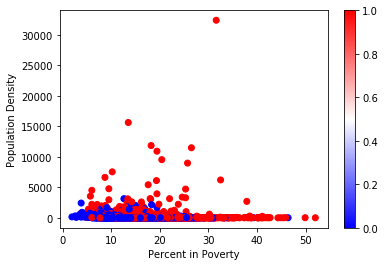

In [214]:
scatter(df['percentPoverty'], df['popDensity'], c=y, cmap='bwr')
colorbar(sc)
xlabel("Percent in Poverty")
ylabel("Population Density")